In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from datetime import date
import math
import seaborn as sns
%matplotlib inline

In [148]:
#A look at the data
#Reading in the raw Seattle Airbnb data and looking at the structure of the raw data

df_raw = pd.read_csv('./listings.csv')
df_raw.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [149]:
#A look at the data
#(number of rows, number of columns) in the raw data
df_raw.shape

(3818, 92)

In [150]:
#A look at the data
#All the column names in the raw data
df_raw.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [151]:
#A look at data
#Columns with missing data in the raw data set descending order
np.sum(df_raw.isnull()).sort_values(ascending = False)


license                             3818
square_feet                         3721
monthly_price                       2301
security_deposit                    1952
weekly_price                        1809
notes                               1606
neighborhood_overview               1032
cleaning_fee                        1030
transit                              934
host_about                           859
host_acceptance_rate                 773
review_scores_accuracy               658
review_scores_checkin                658
review_scores_value                  656
review_scores_location               655
review_scores_cleanliness            653
review_scores_communication          651
review_scores_rating                 647
reviews_per_month                    627
first_review                         627
last_review                          627
space                                569
host_response_time                   523
host_response_rate                   523
neighbourhood   

In [152]:
#A look at data
#Columns with more than 50% values missing
#Drop these columns

set(df_raw.columns[df_raw.isnull().mean() > .50])

{'license', 'monthly_price', 'security_deposit', 'square_feet'}

#### Questions

**1.** Does the number of **amenities** (e.g. heating, TV, wireless internet, washer, dryer etc) affect demand for 1 bed room types (as shown by **availability**). Is it worth investing in a lot of amenities to boost demand for a 1 bed?

**2.** Do hosts categorised as **superhosts** generally receive higher review scores than hosts that are not superhosts?

**3.** How well can we predict price using  the data that we have?

In [153]:
#Preparing the data
#Creating a data frame (df) with only the columns that I MAY need to answer the 3 questions above. 
#Some of the columns that were taken out were for the following reasons:
#No variability (one value for all) - e.g. Market, country, requires_license
#No statistical significance - e.g. picture url, description, name, host url etc
#Columns with more than 50% missing values e.g. 'license', 'monthly_price', 'security_deposit', 'square_feet'

df = df_raw[[
       'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed',
       'neighbourhood_group_cleansed',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities',
       'price', 'weekly_price',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'reviews_per_month']]

In [154]:
#A look at the data
#(number of rows, number of columns) in the new data frame (df) data
df.shape

(3818, 54)

In [155]:
#A look at data
#A Look at the Quantitative variables
df.describe()

,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,availability_30,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,3816.000000,3816.000000,3818.000000,3802.000000,3812.000000,3817.000000,3818.000000,3818.000000,3818.000000,3818.000000,...,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,3818.000000,3191.000000
mean,7.157757,7.157757,3.349398,1.259469,1.307712,1.735394,1.672603,2.369303,780.447617,16.786276,...,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,2.946307,2.078919
std,28.628149,28.628149,1.977599,0.590369,0.883395,1.139480,1.311040,16.305902,1683.589007,12.173637,...,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,5.893029,1.822348
min,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,1.000000,0.020000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,60.000000,2.000000,...,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.695000
50%,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1125.000000,20.000000,...,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.540000
75%,3.000000,3.000000,4.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1125.000000,30.000000,...,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,3.000000
max,502.000000,502.000000,16.000000,8.000000,7.000000,15.000000,15.000000,1000.000000,100000.000000,30.000000,...,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,37.000000,12.150000


In [156]:
#A look at data
##list of columns with Quantitative variables

df.describe().columns

Index(['host_listings_count', 'host_total_listings_count', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'guests_included', 'minimum_nights',
       'maximum_nights', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')

In [157]:
#A look at data
#Columns with missing data in descending order
np.sum(df.isnull()).sort_values(ascending = False)

weekly_price                        1809
cleaning_fee                        1030
host_about                           859
host_acceptance_rate                 773
review_scores_checkin                658
review_scores_accuracy               658
review_scores_value                  656
review_scores_location               655
review_scores_cleanliness            653
review_scores_communication          651
review_scores_rating                 647
last_review                          627
first_review                         627
reviews_per_month                    627
host_response_time                   523
host_response_rate                   523
host_neighbourhood                   300
bathrooms                             16
host_location                          8
bedrooms                               6
host_since                             2
host_total_listings_count              2
host_identity_verified                 2
host_has_profile_pic                   2
host_listings_co

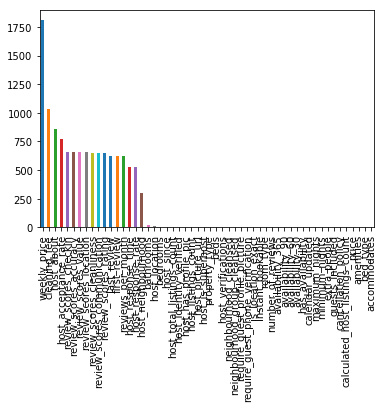

In [158]:
#A look at data
#Columns with missing data in descending order as a bar chart
np.sum(df.isnull()).sort_values(ascending = False).plot(kind = 'bar')

In [159]:
#Know your data
#list columns with 0 missing values

no_nulls = df.columns[df.isnull().sum()==0]
no_nulls.shape, no_nulls

((25,), Index(['host_verifications', 'neighbourhood_cleansed',
        'neighbourhood_group_cleansed', 'is_location_exact', 'room_type',
        'accommodates', 'bed_type', 'amenities', 'price', 'guests_included',
        'extra_people', 'minimum_nights', 'maximum_nights', 'calendar_updated',
        'has_availability', 'availability_30', 'availability_60',
        'availability_90', 'availability_365', 'number_of_reviews',
        'instant_bookable', 'cancellation_policy',
        'require_guest_profile_picture', 'require_guest_phone_verification',
        'calculated_host_listings_count'],
       dtype='object'))

In [160]:
#Know your data
#list columns with at least 1 missing value(s)

with_nulls = df.columns[df.isnull().sum() > 0]
with_nulls.shape, with_nulls

((29,),
 Index(['host_since', 'host_location', 'host_about', 'host_response_time',
        'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
        'host_picture_url', 'host_neighbourhood', 'host_listings_count',
        'host_total_listings_count', 'host_has_profile_pic',
        'host_identity_verified', 'property_type', 'bathrooms', 'bedrooms',
        'beds', 'weekly_price', 'cleaning_fee', 'first_review', 'last_review',
        'review_scores_rating', 'review_scores_accuracy',
        'review_scores_cleanliness', 'review_scores_checkin',
        'review_scores_communication', 'review_scores_location',
        'review_scores_value', 'reviews_per_month'],
       dtype='object'))

In [161]:
#FOR QUESTION 1
#Split list of amenities for each listing, and
#Calculate total number of amenities for each listing
#Add a column for the total number of amenities

df[['amenities_1', 'amenities_2','amenities_3','amenities_4','amenities_5','amenities_6','amenities_7','amenities_8','amenities_9','amenities_10','amenities_11','amenities_12','amenities_13','amenities_14','amenities_15','amenities_16','amenities_17','amenities_18','amenities_19','amenities_20','amenities_21','amenities_22','amenities_23','amenities_24','amenities_25','amenities_26','amenties_27','amenties_28','amenties_29', 'amenities_30']] = df['amenities'].str.split(',', expand=True)

x =df[['amenities_1', 'amenities_2','amenities_3','amenities_4','amenities_5','amenities_6','amenities_7','amenities_8','amenities_9','amenities_10','amenities_11','amenities_12','amenities_13','amenities_14','amenities_15','amenities_16','amenities_17','amenities_18','amenities_19','amenities_20','amenities_21','amenities_22','amenities_23','amenities_24','amenities_25','amenities_26','amenties_27','amenties_28','amenties_29', 'amenities_30']]
df['amenities_total'] = x.count(axis = 1) 
df[['amenities_1', 'amenities_2','amenities_3','amenities_4','amenities_5','amenities_6','amenities_7','amenities_8','amenities_9','amenities_10','amenities_11','amenities_12','amenities_13','amenities_14','amenities_15','amenities_16','amenities_17','amenities_18','amenities_19','amenities_20','amenities_21','amenities_22','amenities_23','amenities_24','amenities_25','amenities_26','amenties_27','amenties_28','amenties_29', 'amenities_30', 'amenities_total']]


/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,amenities_1,amenities_2,amenities_3,amenities_4,amenities_5,amenities_6,amenities_7,amenities_8,amenities_9,amenities_10,...,amenities_22,amenities_23,amenities_24,amenities_25,amenities_26,amenties_27,amenties_28,amenties_29,amenities_30,amenities_total
0,{TV,"""Cable TV""",Internet,"""Wireless Internet""","""Air Conditioning""",Kitchen,Heating,"""Family/Kid Friendly""",Washer,Dryer},...,None,None,None,None,None,None,None,None,None,10
1,{TV,Internet,"""Wireless Internet""",Kitchen,"""Free Parking on Premises""","""Buzzer/Wireless Intercom""",Heating,"""Family/Kid Friendly""",Washer,Dryer,...,None,None,None,None,None,None,None,None,None,16
2,{TV,"""Cable TV""",Internet,"""Wireless Internet""","""Air Conditioning""",Kitchen,"""Free Parking on Premises""","""Pets Allowed""","""Pets live on this property""",Dog(s),...,None,None,None,None,None,None,None,None,None,21
3,{Internet,"""Wireless Internet""",Kitchen,"""Indoor Fireplace""",Heating,"""Family/Kid Friendly""",Washer,Dryer,"""Smoke Detector""","""Carbon Monoxide Detector""",...,None,None,None,None,None,None,None,None,None,14
4,{TV,"""Cable TV""",Internet,"""Wireless Internet""",Kitchen,Heating,"""Family/Kid Friendly""","""Smoke Detector""","""Carbon Monoxide Detector""","""First Aid Kit""",...,None,None,None,None,None,None,None,None,None,13
5,"{""Wireless Internet""","""Free Parking on Premises""",Heating,"""Smoke Detector""",Essentials,Shampoo},None,None,None,None,...,None,None,None,None,None,None,None,None,None,6
6,"{""Wireless Internet""","""Free Parking on Premises""",Heating,"""Smoke Detector""","""First Aid Kit""",Essentials,Shampoo},None,None,None,...,None,None,None,None,None,None,None,None,None,7
7,"{""Wireless Internet""","""Pets live on this property""",Dog(s),Heating,"""Family/Kid Friendly""",Essentials,Shampoo},None,None,None,...,None,None,None,None,None,None,None,None,None,7
8,{TV,"""Cable TV""",Internet,"""Wireless Internet""",Kitchen,Breakfast,"""Indoor Fireplace""",Heating,Washer,Dryer,...,None,None,None,None,None,None,None,None,None,15
9,{TV,Internet,"""Wireless Internet""",Kitchen,"""Free Parking on Premises""","""Buzzer/Wireless Intercom""",Heating,"""Family/Kid Friendly""",Washer,Dryer,...,None,None,None,None,None,None,None,None,None,16


In [162]:
#FOR QUESTION 1
#Confirming that there are no null values on the 'amenities_total' column
df.amenities_total.isna().sum()

0

In [163]:
#FOR QUESTION 1
#I will now be working with just the number of ameninities_total column so I will drop the amenities column and amenities_1 to amenities_30

df_a = df.drop(['amenities_1', 'amenities_2','amenities_3','amenities_4','amenities_5','amenities_6','amenities_7','amenities_8','amenities_9','amenities_10','amenities_11','amenities_12','amenities_13','amenities_14','amenities_15','amenities_16','amenities_17','amenities_18','amenities_19','amenities_20','amenities_21','amenities_22','amenities_23','amenities_24','amenities_25','amenities_26','amenties_27','amenties_28','amenties_29', 'amenities_30', 'amenities'], axis = 1)
df_a.head(2)


,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_picture_url,host_neighbourhood,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,amenities_total
0,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,...,10.0,9.0,10.0,f,moderate,f,f,2,4.07,10
1,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,...,10.0,10.0,10.0,f,strict,t,t,6,1.48,16


In [164]:
#FOR QUESTION 1
#Confirming that all listings have availability set to true
#Note - 'has_availability', 'availability_30', 'availability_60','availability_90', 'availability_365' ALL do not have nulls so we can use these columns without any data wrangling required
df_a.has_availability.sort_values().value_counts()

t    3818
Name: has_availability, dtype: int64

In [165]:
#FOR QUESTION 1
#Subsetting the dataframe for question 1 as df_q1
#Subsetting data for where number of bedrooms = 1
df_q1 = df_a[['amenities_total','beds','availability_30', 'availability_60','availability_90', 'availability_365']]
df_q1 = df_q1[df_q1['beds'] == 1]
df_q1.head()

,amenities_total,beds,availability_30,availability_60,availability_90,availability_365
0,10,1.0,14,41,71,346
1,16,1.0,13,13,16,291
5,6,1.0,0,0,27,302
6,7,1.0,20,49,71,346
7,7,1.0,22,42,42,100


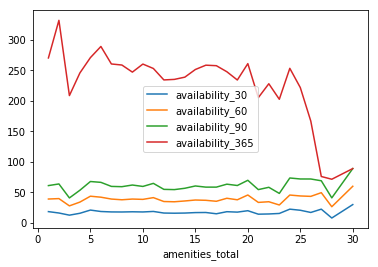

In [166]:
#FOR QUESTION 1
#Plotting a line graph for the mean availability_30, availability_60, availability_90 and availability_365 against the amenities_total values
df_q1.groupby(['amenities_total']).mean()[['availability_30', 'availability_60','availability_90', 'availability_365']].plot()

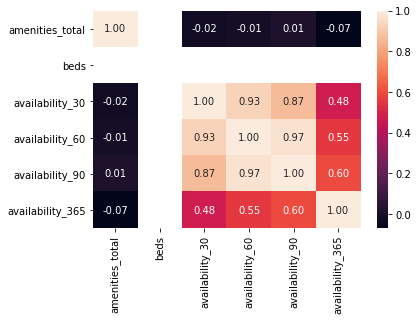

In [167]:
#FOR QUESTION 1
#Confirming correlation of amenities_total with the various availabilities
sns.heatmap(df_q1.corr(), annot=True, fmt=".2f");

#### Line break for question 2
Do hosts categorised as **superhosts** generally receive higher review scores than hosts that are not superhosts?

In [168]:
#Question 2
#Subsetting only the columns that I need to answer this question
df_b = df[['host_is_superhost','review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location','review_scores_value']]
df_b.shape

(3818, 8)

In [169]:
#Question 2
#Counting host_is_superhost '= True' versus  '= False' values
df_b.host_is_superhost.value_counts()

f    3038
t     778
Name: host_is_superhost, dtype: int64

In [170]:
#Question 2
#Subsetting where 'host_is_superhost is NaN'
df_b.host_is_superhost.isna().sum()

2

In [171]:
#Question 2
#Drop rows where 'host_is_superhost' is NaN
df_c = df_b.dropna(subset = ['host_is_superhost'], axis = 0)
df_c.shape

(3816, 8)

In [172]:
#Question 2
#Chech rows where there wasn't any review score entered i.e. all review_scores columns are NaN
df_c[(df_c['review_scores_rating'].isna()) & (df_c['review_scores_accuracy'].isna()) & (df_c['review_scores_cleanliness'].isna()) & (df_c['review_scores_checkin'].isna())& (df_c['review_scores_communication'].isna())& (df_c['review_scores_location'].isna())& (df_c['review_scores_value'].isna())].shape


(645, 8)

In [173]:
#Question 2
#Drop rows where there wasn't any review score entered i.e. all review_scores columns are NaN

df_d = df_c.dropna(subset = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location','review_scores_value'], how = 'all')
df_d.head(2)

,host_is_superhost,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,f,95.0,10.0,10.0,10.0,10.0,9.0,10.0
1,t,96.0,10.0,10.0,10.0,10.0,10.0,10.0


In [174]:
#Question 2
#Columns with missing data in descending order
np.sum(df_d.isnull()).sort_values(ascending = False)

review_scores_checkin          11
review_scores_accuracy         11
review_scores_value             9
review_scores_location          8
review_scores_cleanliness       6
review_scores_communication     4
review_scores_rating            0
host_is_superhost               0
dtype: int64

In [175]:
#Question 2
#Fill missing data with the mean of that column
df_d.fillna(df_d[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location','review_scores_value']].mean(), inplace = True)
df_d.isna().sum()

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


host_is_superhost              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
dtype: int64

In [176]:
#Question 2
#Split into two data sets based on whether host_is_superhost is true or not
df_1 = df_d[df_d['host_is_superhost'] == 't'] # Subset df to only those with HigherEd of 1
df_0 = df_d[df_d['host_is_superhost'] == 'f'] # Subset df to only those with HigherEd of 0

In [177]:
#Question 2
 #Assure it looks like what you would expect
print(df_1['host_is_superhost'][:2])
print(df_0['host_is_superhost'][:2])

1    t
6    t
Name: host_is_superhost, dtype: object
0    f
2    f
Name: host_is_superhost, dtype: object


In [178]:
#Assure it looks like what you would expect
#Add a row with the mean for each column
df_0.loc['mean'] = df_0.mean()
df_0.iloc[-3:]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,host_is_superhost,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
3813,f,80.000000,8.000000,10.000000,4.000000,8.000000,10.000000,8.000000
3814,f,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,NaN,93.652893,9.552893,9.454272,9.731675,9.758363,9.564823,9.359946


In [179]:
#Assure it looks like what you would expect
#Add a row with the mean for each column
df_1.loc['mean'] = df_1.mean()
df_1.iloc[-3:]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,host_is_superhost,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
3806,t,100.000000,10.000000,10.000000,10.000000,10.0000,10.000000,10.000000
3812,t,96.000000,10.000000,10.000000,10.000000,10.0000,9.000000,10.000000
mean,NaN,97.395473,9.905459,9.885486,9.964048,9.9747,9.750999,9.749667


In [180]:
#Question 2
#Subset the mean row and transpose
value = ['mean']
df_1_a = df_1[df_1.index.isin(value)]
df_1_q2 = df_1_a.dropna(axis = 1).transpose()
df_1_q2

,mean
review_scores_rating,97.395473
review_scores_accuracy,9.905459
review_scores_cleanliness,9.885486
review_scores_checkin,9.964048
review_scores_communication,9.974700
review_scores_location,9.750999
review_scores_value,9.749667


In [181]:
#Question 2
#Subset the mean row and transpose
df_0_a= df_0[df_0.index.isin(value)]
df_0_q2 = df_0_a.dropna(axis = 1).transpose()
df_0_q2

,mean
review_scores_rating,93.652893
review_scores_accuracy,9.552893
review_scores_cleanliness,9.454272
review_scores_checkin,9.731675
review_scores_communication,9.758363
review_scores_location,9.564823
review_scores_value,9.359946


In [182]:
#Question 2
#Merge the two mean data frames and calculate the Difference per each review score category for each of the data frames (host_is_superhost '= True' - '= False')

comp_df = pd.merge(df_1_q2, df_0_q2, left_index=True, right_index=True)
comp_df.columns = ['df_1_q2', 'df_0_q2']
comp_df['Difference'] = (comp_df['df_1_q2'] - comp_df['df_0_q2'])
comp_df.style.bar(subset=['Difference'], align='mid', color=['#d65f5f', '#5fba7d'])


,df_1_q2,df_0_q2,Difference
review_scores_rating,97.3955,93.6529,3.74258
review_scores_accuracy,9.90546,9.55289,0.352567
review_scores_cleanliness,9.88549,9.45427,0.431214
review_scores_checkin,9.96405,9.73168,0.232373
review_scores_communication,9.9747,9.75836,0.216337
review_scores_location,9.751,9.56482,0.186176
review_scores_value,9.74967,9.35995,0.389721


##### Line break for question 3
How well can we predict price using  the data that we have?

In [183]:
#Question 3
#Using this data frame with the amenities_total column as the base df
df_a.shape 

(3818, 54)

In [184]:
#Question 3
#Converting price data type to a float64 so that the original 'price' column can be replaced by the 'price_converted' column
df_a['price_a'] = df_a['price'].replace({'\$':'', '\,':''}, regex = True)
df_a['price_converted'] = pd.to_numeric(df_a['price_a'])
df_a['price_converted'].dtype


dtype('float64')

In [185]:
#Question 3
#Converting extra_people data type to a float64 so that the original 'extra_people' column can be replaced by the 'extra_people' column
df_a['extra_people_a'] = df_a['extra_people'].replace({'\$':'', '\,':''}, regex = True)
df_a['extra_people_converted'] = pd.to_numeric(df_a['extra_people_a'])
df_a['extra_people_converted'].dtype

dtype('float64')

In [186]:
#Question 3
#Converting host_response_rate type to a float64 so that the original 'host_response_rate' column can be replaced by the 'host_response_rate_converted' column
df_a['host_response_rate_a'] = df_a['host_response_rate'].replace({'\%':'', '\,':''}, regex = True)
df_a['host_response_rate_converted'] = pd.to_numeric(df_a['host_response_rate_a'])
df_a['host_response_rate_converted'].dtype

dtype('float64')

In [187]:
#Question 3
#Converting host acceptance rate data type to a float64 so that the original 'host_acceptance_rate' column can be replaced by the 'host_acceptance_rate_converted' column
df_a['host_acceptance_rate_a'] = df_a['host_acceptance_rate'].replace({'\%':'', '\,':''}, regex = True)
df_a['host_acceptance_rate_converted'] = pd.to_numeric(df_a['host_acceptance_rate_a'])
df_a['host_acceptance_rate_converted'].dtype

dtype('float64')

In [188]:
#Question 3
#Drop columns that I do not wish to use in my model
#Some of the reasoning for this is the columns have data that can not be used i.e. paragraphs, or has been replaced by one of the converted columns etc
df_a1 = df_a.drop(['host_verifications','host_since','first_review', 'last_review','host_location', 'host_about', 'host_picture_url', 'host_neighbourhood', 'weekly_price', 'price', 'price_a', 'extra_people_a', 'extra_people', 'host_response_rate', 'host_response_rate_a', 'host_acceptance_rate', 'host_acceptance_rate_a'], axis = 1)
df_a1.shape

(3818, 45)

In [189]:
#Question 3
#define a function to clean up the data

def clean_data(df_a1):
    # Drop rows with missing price_converted values from the Data Frame
    #There should be none, bit as a precaution
    df_a1 = df_a1.dropna(subset=['price_converted'], axis=0)
    y = df_a1['price_converted']
    
    
    # Fill numeric columns with the mean of the columns
    num_vars = df_a1.select_dtypes(include=['float', 'int', 'float64']).columns
    for col in num_vars:
        df_a1[col].fillna((df_a1[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df_a1.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df_a1 = pd.concat([df_a1.drop(var, axis=1), pd.get_dummies(df_a1[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df_a1
    return X, y
    
#Use the function to create X and y
X, y = clean_data(df_a1)   

In [190]:
X.shape, y.shape

((3818, 313), (3818,))

In [191]:
#Instantiate, Fit, Predict and score the modelfor predicting the price_converted
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42)


#Instantiate the model
lm_model = LinearRegression(normalize=True) 

#Fit - why does this break?
lm_model.fit(X_train, y_train) 

#Predict
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

#return test_score, train_score, lm_model, X_train, X_test, y_train, y_test




In [192]:
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model is {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model is 0.8792510337925293 on 1146 values.'

In [193]:
#Predict and score the model
y_train_preds = lm_model.predict(X_train) 
"The r-squared score for the model is {} on {} values.".format(r2_score(y_train, y_train_preds), len(y_train))

'The r-squared score for the model is 1.0 on 2672 values.'